# VAR

#### We would forecast into the future using VAR for 2 time series datastes which we believe have effects on eachother.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

##Loading datasets from FRED
##M2 Money Stock is how much money people have themselves every month.

df = pd.read_csv('/Users/rahulkumania/Desktop/UDEMY_TSA_FINAL/Data/M2SLMoneyStock.csv', index_col = 0, parse_dates = True)
df.index.freq = "MS"

##Personal consupmtion expenditures of people every month.
df2 = pd.read_csv('/Users/rahulkumania/Desktop/UDEMY_TSA_FINAL/Data/PCEPersonalSpending.csv', index_col = 0, parse_dates = True)
df2.index.freq = 'MS' 

#### Combining two datasets df and df2

In [2]:
df = df.join(df2)

In [3]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


#### Dropping null values

In [4]:
df = df.dropna()

<AxesSubplot:xlabel='Date'>

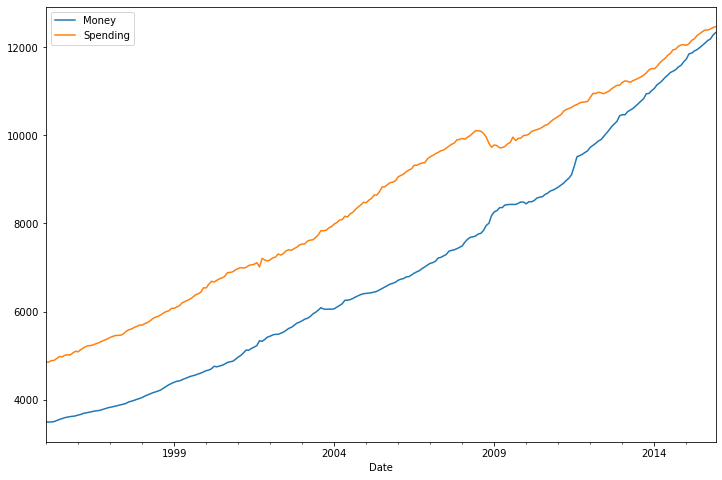

In [5]:
df.plot(figsize =(12,8))

#### Performing test for stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


##### Since our both columns are non-stationary we will do differencing for both columns.

In [9]:
df_transform = df.diff()

In [10]:
adf_test(df_transform["Money"])
#Money column is still non-stationary

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
adf_test(df_transform["Spending"])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


##### Since our Money columns is still non-stationary we will do secnd differencing for both columns.

In [12]:
df_transform_2 = df_transform.diff()

In [13]:
df_transform_2 = df_transform_2.dropna()

In [14]:
adf_test(df_transform_2["Money"])


Augmented Dickey-Fuller Test: 
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [15]:
adf_test(df_transform_2["Spending"])

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#### Performing train and test split

In [16]:
# Num of obersvation
nobs = 12

In [17]:
train = df_transform_2[:-nobs] 
#start from beginning of DF and go to -12 from the end of df

In [18]:
train

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
...,...,...
2014-08-01,-31.9,40.3
2014-09-01,5.6,-70.7
2014-10-01,25.5,52.5


In [19]:
test = df_transform_2[-nobs:]

In [20]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


### GRID Search for Order p (AR) of VAR Model

In [21]:
model = VAR(train)

for p in [1,2,3,4,5,6,7]:
    results = model.fit(p)
    print(f"ORDER{p}")
    print(f"AIC: {results.aic}")
    print("\n")

ORDER1
AIC: 14.178610495220896


ORDER2
AIC: 13.955189367163705


ORDER3
AIC: 13.849518291541038


ORDER4
AIC: 13.827950574458281


ORDER5
AIC: 13.78730034460964


ORDER6
AIC: 13.799076756885809


ORDER7
AIC: 13.797638727913972




In [22]:
#k = 2
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Feb, 2023
Time:                     13:27:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

## PARAMETERS OF FORECAST FUNCTION
    
    #y: it should be a numpy array of dimension p x k (5 X 2),
        basicall it is asking go ahead and give me 5 lagged values               right before the test sets start.
    
    #STEPS: how many steps in future you wanna predict


In [23]:
#datframe to numpy array.
lagged_values_y = train[-5:].values
#train[-5:]

In [24]:
z = results.forecast(y = lagged_values_y, steps = 12)

In [25]:
#Converting numpy array to dataframe

In [26]:
idx = pd.date_range('2015-01-01', periods=12, freq="MS")

In [27]:
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [28]:
df3 = pd.DataFrame(data =z, index =idx, columns=['Money_2', 'Spending_2'])

In [29]:
df3

,Money_2,Spending_2
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


#### Reverse differencing
the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

In [30]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df3['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df3['Money_2'].cumsum()

# Now build the forecast values from the first difference set
df3['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df3['Money1d'].cumsum()

In [31]:
df3

,Money_2,Spending_2,Money1d,MoneyForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371
2015-04-01,-2.602233,5.479458,55.450728,11903.639099
2015-05-01,4.228557,-2.443365,59.679285,11963.318384
2015-06-01,1.559393,0.387639,61.238678,12024.557062
2015-07-01,-0.998410,3.883680,60.240268,12084.797331
2015-08-01,0.364510,-2.356101,60.604779,12145.402109
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261
2015-10-01,0.225877,0.786927,59.620028,12264.416289


In [32]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df3['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df3['Spending_2'].cumsum()

# Now build the forecast values from the first difference set
df3['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df3['Spending1d'].cumsum()

In [33]:
df3

,Money_2,Spending_2,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


In [34]:
test_range_df = df[-nobs:]

<AxesSubplot:xlabel='Date'>

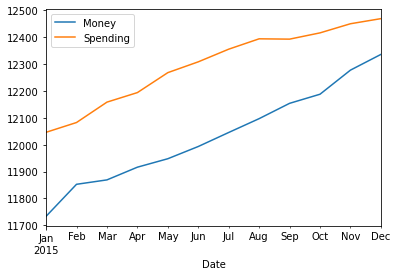

In [35]:
#Plotting our test data range
test_range_df.plot()

<AxesSubplot:>

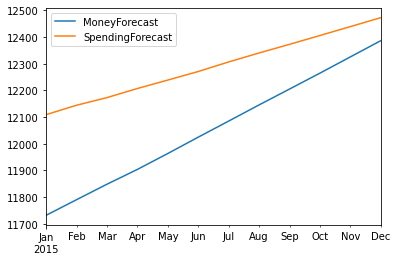

In [36]:
#plotting our Forecasted values
df3[['MoneyForecast','SpendingForecast']].plot()

<AxesSubplot:xlabel='Date'>

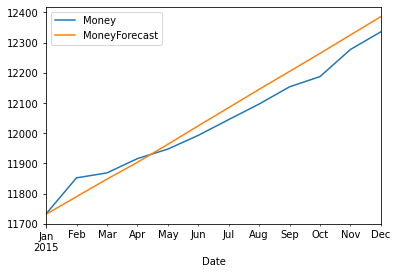

In [37]:
test_range_df['Money'].plot(legend=True)
df3['MoneyForecast'].plot(legend=True)

<AxesSubplot:xlabel='Date'>

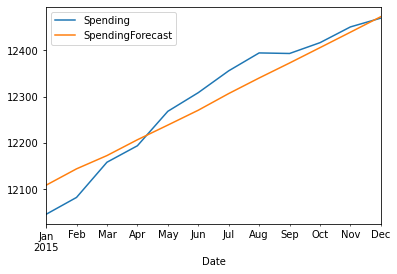

In [38]:
test_range_df['Spending'].plot(legend=True)
df3['SpendingForecast'].plot(legend=True)

#### Evaluating model

In [39]:
rmse(test_range_df["Money"], df3['MoneyForecast'])

43.71049653558893

In [40]:
test_range_df["Money"].mean()

12034.008333333333

In [41]:
rmse(test_range_df["Spending"], df3['SpendingForecast'])

37.001175169408285

In [42]:
test_range_df["Spending"].mean()

12294.533333333333

In [44]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
...,...,...
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8
2015-10-01,12187.7,12416.1


In [46]:
from statsmodels.tsa.stattools import grangercausalitytests

In [49]:
grangercausalitytests(df[['Money','Spending']],maxlag =10);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.6517  , p=0.4195  , df=1
likelihood ratio test: chi2=0.6509  , p=0.4198  , df=1
parameter F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=6.2776  , p=0.0433  , df=2
likelihood ratio test: chi2=6.2001  , p=0.0450  , df=2
parameter F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=10.1034 , p=0.0177  , df=3
likelihood ratio test: chi2=9.9038  , p=0.0194  , df=3
parameter F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6203  , p=0.0357  